In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
input_threads = 5
input_nrhs = 8  # 2^p

#data = pd.read_csv('results_ASIC_680ks.csv')
#data = pd.read_csv('results_scircuit.csv')
#data = pd.read_csv('results_circuit_4.csv')
#data = pd.read_csv('results_Corei7.csv')
#data = pd.read_csv('results_scircuit_c6a.csv')
#data = pd.read_csv('results_scircuit_c6i.csv')
#data = pd.read_csv('results_scircuit_r6i.csv')
#data = pd.read_csv('results_scircuit_c6g.csv')
data = pd.read_csv('results_scircuit_c7g.csv')
#data = pd.read_csv('results_scircuit_corei9.csv')
#data = pd.read_csv('results_scircuit_gold6128.csv')

print(data.head())

   Unnamed: 0  index  threads  nrhs    time1
0           0      0        1     1   9629.3
1           1      1        1     2  11490.6
2           2      2        1     4  11628.2
3           3      3        1     8  15375.7
4           4      4        1    16  24337.7


In [39]:
#nrhs = [1,2,4,8,16,32,64,128]
nrhs = np.arange(0, input_nrhs+1)
nrhs = np.power(2, nrhs).tolist()
threads = np.arange(1, input_threads+1).tolist()

grid = np.zeros((len(threads),len(nrhs)))
grid[0,0]=1

print(threads, nrhs)

[1, 2, 3, 4, 5] [1, 2, 4, 8, 16, 32, 64, 128, 256]


In [40]:
ref = data['time1'][0]

for index, row in data.iterrows():
    threads_i = row['threads']
    nrhs_i = row['nrhs']
    time_i = row['time1']
    
    index_threads = threads.index(threads_i)
    index_nrhs = nrhs.index(nrhs_i)
    
    #print(index_threads, index_nrhs)

    time_per_solve = time_i / (threads_i * nrhs_i)
    grid[index_threads, index_nrhs] = ref / time_per_solve

print(grid)

[[ 1.          1.67603084  3.31239573  5.01013938  6.33045851  6.8287762
   6.83269804  6.5824841   6.37107006]
 [ 1.95187854  3.24899832  6.43003573  9.60229355 11.90262745 12.78375031
  12.71270765 12.69695337 12.22777352]
 [ 2.89980928  4.85449733  9.39283537 14.08169831 17.42314434 18.62346234
  18.52601201 17.92452955 17.44668869]
 [ 2.99982866  5.50422636 10.41821969 16.09535898 21.32004885 23.87053692
  23.86651563 23.90342828 22.69989525]
 [ 2.46612987  4.32534531  8.49627875 14.16214109 18.7237104  20.46599115
  20.87426837 20.24344353 22.40564836]]


In [41]:
list(map(str, nrhs))

['1', '2', '4', '8', '16', '32', '64', '128', '256']

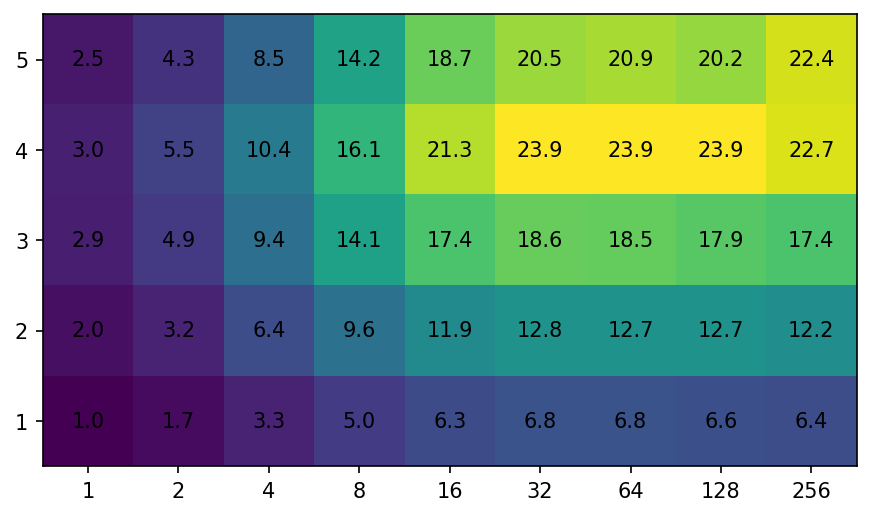

In [42]:
fig = plt.figure(figsize=(7,7), dpi=150)
ax = fig.add_subplot(111)
im = ax.imshow(grid,interpolation='nearest')
ax.set_xticks(np.arange(0,len(nrhs)))
ax.set_xticklabels(nrhs)

ax.set_yticks(np.arange(0,len(threads)))
ax.set_yticklabels(threads)
#fig.colorbar(im)
ax.invert_yaxis()
for (j,i),label in np.ndenumerate(grid):
    ax.text(i,j,round(label,1),ha='center',va='center')